In [20]:
import numpy as np

In [21]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [22]:
x,y=make_blobs(n_samples=50,n_features=2,centers=2,cluster_std=1.05,random_state=40)
y=np.where(y==0,-1,1)

In [23]:
clf=SVC(kernel='linear')
clf.fit(x,y)

SVC(kernel='linear')

In [24]:
def visualize_svm(model):
    plt.scatter(x[:,0],x[:,1],c=y,cmap='winter')
    
    ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()

    xx=np.linspace(xlim[0],xlim[1],30)
    yy=np.linspace(ylim[0],ylim[1],30)
    yy,xx=np.meshgrid(yy,xx)
    xy=np.vstack([xx.ravel(),yy.ravel()]).T
    Z=clf.decision_function(xy).reshape(xx.shape)

    ax.contour(xx,yy,Z,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
    ax.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=100,linewidth=1,facecolors='none',edgecolors='k')
    plt.show()


Accuracy: 1.0
Confusion Matrix:
[[4 0]
 [0 6]]


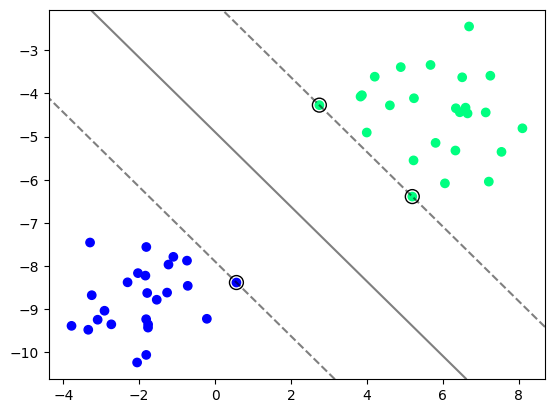

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

visualize_svm(clf)